<a href="https://colab.research.google.com/github/zun43d/CSE-432/blob/main/2215151019_Transfer_Learning_image_classification_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow.keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/temp/Cattle Breeds'
img_size = (224, 224)
batch_size = 32
seed = 39

In [ ]:
# Load full dataset
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    seed=seed,
    shuffle=True,  # Shuffle before splitting
)

# Print the number of valid files found
print(f"Found {len(full_ds.file_paths)} valid image files.")

Found 1208 files belonging to 5 classes.
Found 1208 valid image files.


In [ ]:
# Split manually: 80% train, 20% test
dataset_size = len(full_ds)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

train_ds = full_ds.take(train_size)
test_ds = full_ds.skip(train_size)

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomBrightness, RandomContrast

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomBrightness(0.2),
    RandomContrast(0.2),
])

In [ ]:
# Apply augmentation
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

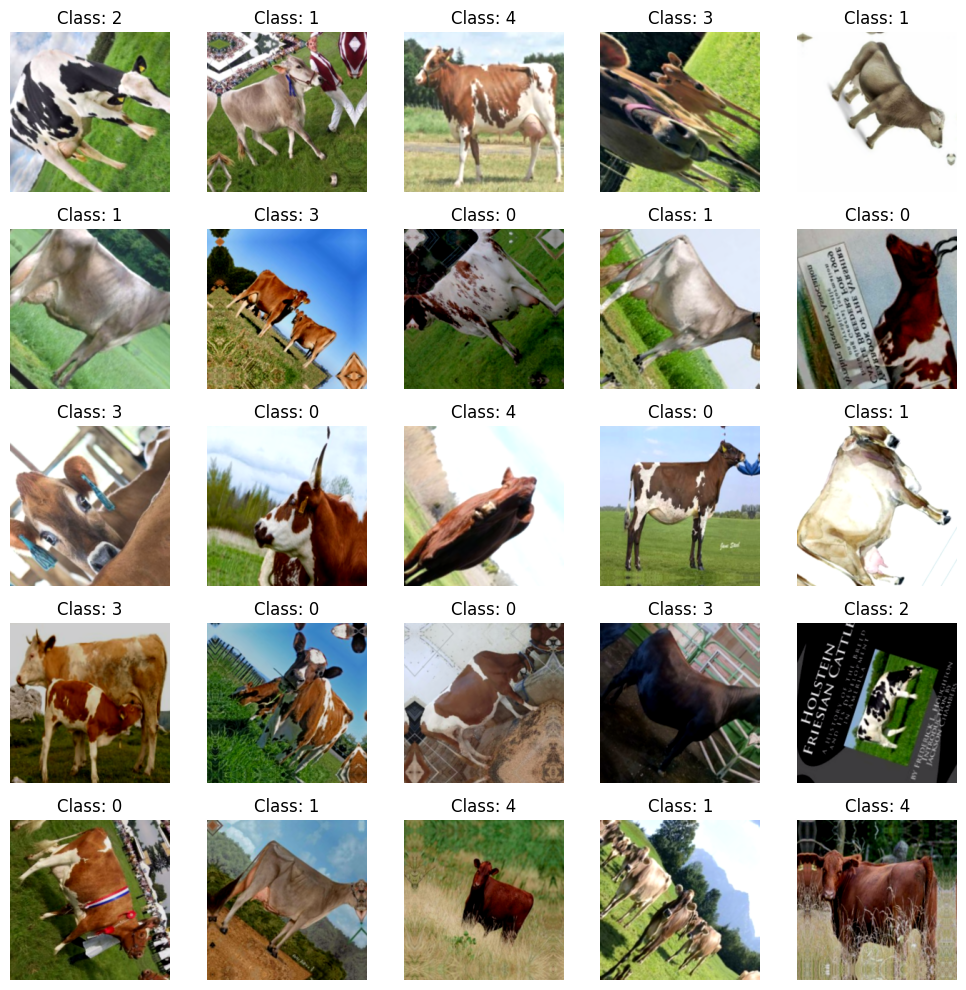

In [ ]:
# Show Images

import matplotlib.pyplot as plt

# Take a single batch of images from the augmented training dataset
image_batch, label_batch = next(iter(augmented_train_ds))

# Number of images to display (25 in a 5x5 grid)
num_images_to_display = 25

# Create a 5x5 grid for the images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Iterate over the images in the batch
for i in range(num_images_to_display):
  ax = axes[i // 5, i % 5]  # Get the current subplot
  ax.imshow(image_batch[i].numpy().astype("uint8"))  # Display the image
  ax.set_title(f"Class: {label_batch[i].numpy()}")  # Set the class label as the title
  ax.axis("off")  # Turn off axes

plt.tight_layout()
plt.show()


In [ ]:
# Transfer Learning

# Load pre-trained VGG16 model (excluding top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(full_ds.class_names), activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(augmented_train_ds, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,757 (80.64 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 565s 19s/step - accuracy: 0.2931 - loss: 51.6920
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 555s 18s/step - accuracy: 0.4022 - loss: 1.7860
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 557s 18s/step - accuracy: 0.3162 - loss: 2.3731
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 563s 18s/step - accuracy: 0.4528 - loss: 1.2539
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 548s 18s/step - accuracy: 0.5186 - loss: 1.0874
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 563s 18s/step - accuracy: 0.5847 - loss: 1.0430
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 549s 18s/step - accuracy: 0.5915 - loss: 1.0215
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 560s 18s/step - accuracy: 0.6419 - loss: 0.8871
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 563s 18s/step - accuracy: 0.6408 - loss: 0.8656
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 564s 18s/step - accuracy: 0.6570 - loss: 0.9075
8/8 ━━━━━━━━━━━━━━━━━━━━ 142s 17s/step - accuracy: 0.7083 - loss: 1.2689
Test Accuracy: 0.72


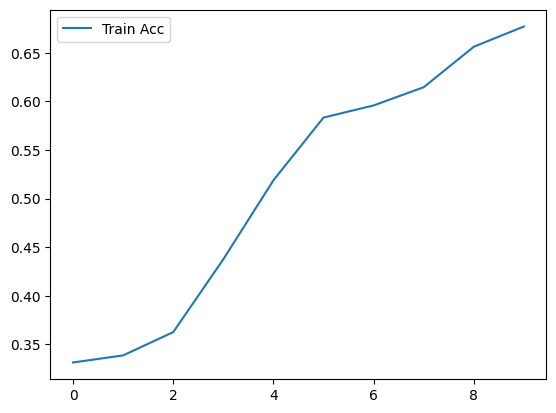

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.legend()
plt.show()